# Sentiment Analysis on Amazon Reviews

In [112]:
# Importing some necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [113]:
amazon = pd.read_csv(r'E:\Imarticus\Dataset\amazonreviews.tsv' , sep = '\t')   # file is loaded 

In [114]:
amazon.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [115]:
amazon.shape    # this is dimension of dataset (10000 rows & 2 columns)

(10000, 2)

### Sentiment Analysis

In [116]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [117]:
sentiment = SentimentIntensityAnalyzer()   # creating instance

In [118]:
# now for checking purpose , we take 1st review from our dataset

amazon.iloc[0,1]   #[0,1] --> as indexing starts with 0 in python, 0 means first row & 1 means 2nd column.

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

#### now apply the sentiment analysis to this first comment

In [119]:
output = sentiment.polarity_scores(amazon.iloc[0,1])
output

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

So this 'compound' indicates positivity or negativity of comment as its greater than zero means comment is positive and vice versa and if compound is zero then comment is neutral 

#### Now applying this sentimental analysis to all of this reviews

In [120]:
comp_score = [] #empty list
pos_score  = [] #empty list
neg_score  = [] #empty list

for i in range (0,amazon.shape[0]):  # amazon.shape[0] means all rows
    analysis = sentiment.polarity_scores(amazon.iloc[i , 1])
    comp = analysis['compound']
    comp_score.append(comp)  # this will collects compound score of all reviews
    
    pos  = analysis['pos']
    pos_score.append(pos)   # this will collects positive score of all reviews
    
    neg  = analysis['neg']
    neg_score.append(neg)   # this will collects negatice score of all reviews

So Now we have to add this scores to amazon dataframe in order to make easiness for observation

In [121]:
amazon['positive_score'] = pos_score
amazon['negative_score'] = neg_score
amazon['compound_score'] = comp_score

In [122]:
amazon.head()

,label,review,positive_score,negative_score,compound_score
0,pos,Stuning even for the non-gamer: This sound tra...,0.243,0.088,0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,0.145,0.018,0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,0.268,0.040,0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,0.295,0.090,0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",0.254,0.000,0.9781


In [123]:
amazon.compound_score.mean()

0.3352067199999999

In [124]:
amazon.compound_score.median()

0.6696

In [125]:
amazon.compound_score.min()

-0.9945

In [126]:
amazon.compound_score.max()

0.9987

### So , now we are finding numbers of positive and negative reviews

In [127]:
positive = len(amazon.compound_score[amazon.compound_score > 0])
negative = len(amazon.compound_score[amazon.compound_score < 0])
neutral  = len(amazon.compound_score[amazon.compound_score == 0])

print('Total number of positive reviews are :- ' , positive)
print('Total number of negative reviews are :- ' , negative)
print('Total number of neutral reviews are  :- ', neutral)

Total number of positive reviews are :-  6795
Total number of negative reviews are :-  3064
Total number of neutral reviews are  :-  141


### Text Blob method

In [128]:
amazon = pd.read_csv(r'E:\Imarticus\Dataset\amazonreviews.tsv' , sep = '\t')

In [129]:
amazon.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [130]:
from textblob import TextBlob

In [131]:
analysis = TextBlob(amazon.iloc[0,1])
analysis.sentiment

Sentiment(polarity=-0.02187500000000002, subjectivity=0.5499999999999999)

Polarity tells us positivity or negativity of review (+ value means positive review and vice versa) ,
Subjectivity tells about fact or opinion of review

In [132]:
score_pol = [] #empty list

for i in range(0,amazon.shape[0]):  # taken all rows in review 
    score = TextBlob(amazon.iloc[i][1]).sentiment
    score1 = score[0]  # score[0] --> polarity score only (as we have to decide review is +ve or -ve)
    score_pol.append(score1)

In [133]:
amazon['sentiment_score'] = score_pol

In [134]:
amazon.head()

,label,review,sentiment_score
0,pos,Stuning even for the non-gamer: This sound tra...,-0.021875
1,pos,The best soundtrack ever to anything.: I'm rea...,0.261111
2,pos,Amazing!: This soundtrack is my favorite music...,0.274691
3,pos,Excellent Soundtrack: I truly like this soundt...,0.272727
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",0.324802


In [135]:
amazon.sentiment_score.mean()

0.14501923626191635

In [136]:
amazon.sentiment_score.median()

0.14999999999999997

In [137]:
amazon.sentiment_score.max()

1.0

In [138]:
amazon.sentiment_score.min()

-1.0

### Now we sagrigating reviews in positive and negative reviews

In [139]:
positive_review = len(amazon.sentiment_score[amazon.sentiment_score > 0])
negative_review = len(amazon.sentiment_score[amazon.sentiment_score < 0])
neutral_review = len(amazon.sentiment_score[amazon.sentiment_score == 0])

print('Total number of positive reviews are :- ', positive_review)
print('Total number of negative reviews are :- ', negative_review)
print('Total number of neutral reviews are :- ', neutral_review)

Total number of positive reviews are :-  7411
Total number of negative reviews are :-  2428
Total number of neutral reviews are :-  161


### WordCloud

In [140]:
from wordcloud import WordCloud   # importing wordcloud

In [141]:
from nltk.corpus import stopwords
stopwords.words('english')  
# this shows words which are commonly used in sentences but doesnt add any value for sentimental analysis 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

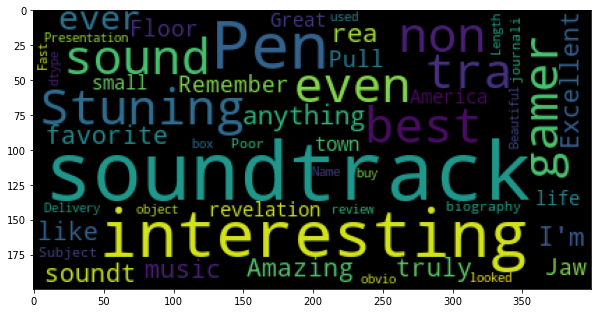

In [142]:
chart = WordCloud(stopwords=stopwords.words('english') , max_words=  50).generate(str(amazon.review))
plt.figure(figsize=(10,10))
plt.imshow(chart)

Above Wordcloud shows some words which are  frequantly used in reviews of amazon 

### --- End of Notebook ---